# Challenge 4: Nested dictionaries

Next week we will deal with web scraping and API's. Python wise this means since we will encounter file formats like JSON we will have to deal with a lot of dictionaries. Not only ordinary dictionaries, but also nested ones. In this lab we will train handling them.

In the following, if we show values with markdown, just copy-paste them into your `# my code here` field if you need them.

**Warm up phase: Here are some keys and values. Use them to build a dictionary called `numbers_dct`**

```python
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]
```

In [1]:
keys = ['hundred', 'twohundred', 'threehundred']
values = [10, 20, 30]
numbers_dct = {}
for item in range(0,len(keys)):
    numbers_dct[keys[item]] = values[item]
numbers_dct

{'hundred': 10, 'twohundred': 20, 'threehundred': 30}

**Here are two dictionaries. Merge their entries to a third dictionary**

```python
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}
```

In [2]:
dict1 = {'One': 1, 'Two': 2, 'Six': 6}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}
dict3 = dict1|dict2
dict3

{'One': 1, 'Two': 2, 'Six': 6, 'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

**Nested dictionaries**

Here comes a bigger, nested dictionary. Store Martin's French grades in a variable called `martins_french` by navigating to the value using keys and values. Remember, while you drill down the structure of the dictionary and you encounter a new dictionary, you can always use `.keys()` and `.values()` to not loose orientation.

In [3]:
sampleDict = {
    "class":{
        "student_list":{
            "Anna":{
                "marks":{
                    "physics":[70, 20, 100, 20],
                    "history":[80,10,55,35],
                    "math":[100, 90, 70, 35],
                }
            },
            "Martin":{
                "marks":{
                    "french":[20, 10, 35, 45],
                    "spanish":[40, 75, 50, 90],
                    "math": [90,85, 90, 95],
                }
            },
            "Richard":{
                "marks":{
                    "physics":[10, 10, 0, 90],
                    "biology":[50, 50, 70, 75],
                    "math":[90, 70, 50, 40],
                }
            }
        }
    }
}

In [4]:
martins_french = sampleDict["class"]['student_list']['Martin']['marks']['french']
martins_french

[20, 10, 35, 45]

**Calculate the mean of Richard's biology's grades**

In [5]:
import numpy as np
richards_bio = sampleDict["class"]['student_list']['Richard']['marks']['biology']
np.mean(richards_bio)

61.25

**Return a list of all the students**

In [6]:
student_lst = list(sampleDict["class"]['student_list'].keys())
student_lst

['Anna', 'Martin', 'Richard']

**Return Anna's 2nd grade in history**

In [7]:
annas_2nd_history_grade = sampleDict["class"]['student_list']['Anna']['marks']['history'][1]
annas_2nd_history_grade

10

**Return all the grades that are 3rd in the list for every subject for all the students**

Use appropriate `for` loops and a `print()` statement

In [8]:
for student in list(sampleDict["class"]['student_list'].keys()):
    print(student,"'s third marks are:'", sep="")
    for subject in list(sampleDict["class"]['student_list'][student]['marks'].keys()):
        if subject == "math":
            print("   ",subject,"    ",list(sampleDict["class"]['student_list'][student]['marks'][subject])[2])
        elif subject == "french":
            print("   ",subject,"  ",list(sampleDict["class"]['student_list'][student]['marks'][subject])[2]) 
        else:
            print("   ",subject," ",list(sampleDict["class"]['student_list'][student]['marks'][subject])[2])

Anna's third marks are:'
    physics   100
    history   55
    math      70
Martin's third marks are:'
    french    35
    spanish   50
    math      90
Richard's third marks are:'
    physics   0
    biology   70
    math      50


**Get all the grades and store them in a list `all_grades` Calculate the mean (solution: 55.97)**

You can of course use a modified version of your solution of the previous question.

In [9]:
all_grades = []
for student in list(sampleDict["class"]['student_list'].keys()):
    for subject in list(sampleDict["class"]['student_list'][student]['marks'].keys()):
        for grade in list(sampleDict["class"]['student_list'][student]['marks'][subject]):
            all_grades.append(grade)
round(np.mean(all_grades),2)

55.97

**Save that list as a column in a pandas dataframe and plot a histogram with it**

array([[<AxesSubplot:title={'center':'Grades'}>]], dtype=object)

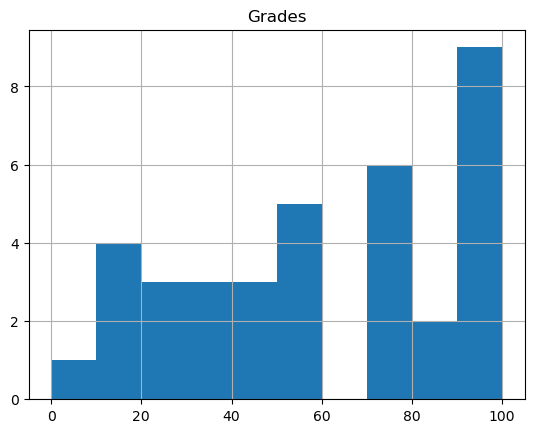

In [10]:
import pandas as pd
df = pd.DataFrame({"Grades":all_grades})
df.hist()

Output should look like this

**Return all the students subjects. Watch out: We don't want repetitions!**

In [11]:
all_subjects = []
for student in list(sampleDict["class"]['student_list'].keys()):
    for subject in list(sampleDict["class"]['student_list'][student]['marks'].keys()):
        all_subjects.append(subject)
        
set(all_subjects)

{'biology', 'french', 'history', 'math', 'physics', 'spanish'}

Output should look like this

**Richard heard you're a data enthusiast and asks you to hack the school server and and replace his worst physics grade rounded to full integers (0) with the mean of his physics grades (he doesn't want to raise suspicion). Help him do that. Check wether your hack was successful by printing his physics grade**

In [12]:
import numpy as np
richards_physics = sampleDict["class"]['student_list']['Richard']['marks']['physics']
for i in range(0,len(richards_physics)):
    if sampleDict["class"]['student_list']['Richard']['marks']['physics'][i]==min(richards_physics): 
        print(sampleDict["class"]['student_list']['Richard']['marks']['physics'][i])
        sampleDict["class"]['student_list']['Richard']['marks']['physics'][i] = round(np.mean(sampleDict["class"]['student_list']['Richard']['marks']['physics']))
        break
sampleDict["class"]['student_list']['Richard']['marks']['physics']

0


[10, 10, 28, 90]

**The hack was discovered! They found out it must have been Richard because his physics grade is not a multiple of 5 like all the other grades**

Expell Richard (poor Richard!) by removing him from the dictionary. Use `del`. And print the resulting class dictionary.

In [13]:
del sampleDict["class"]['student_list']['Richard']
sampleDict

{'class': {'student_list': {'Anna': {'marks': {'physics': [70, 20, 100, 20],
     'history': [80, 10, 55, 35],
     'math': [100, 90, 70, 35]}},
   'Martin': {'marks': {'french': [20, 10, 35, 45],
     'spanish': [40, 75, 50, 90],
     'math': [90, 85, 90, 95]}}}}}